<h1 style='font-size: 65px; color: green; font-family: Neuterous; font-weight: 600'>WordClouds with Python</h1>

<img src="../Resources/Wordclaud.png" alt="WorldCloud" width="1200" height="1000">

<h1 style='font-size: 25px; color: crimson; font-family: Dubai; font-weight: 600'>Import required libraries</h1>

`pip install wordcloud, numpy, PIL, nltk, matplotlib`

In [12]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#nltk.download('stopwords')
from nltk.corpus import stopwords

<h1 style='font-size: 25px; color: crimson; font-family: Dubai; font-weight: 600'>Loading Dataset</h1>

In [13]:
df = pd.read_excel("../Datasets/Weedkiller_reviews.xlsx")
pd.set_option('display.max_colwidth', 120)
df.sample(5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Reviews_ID,Region,Review_date,Reviews
118,14476,Rukwa,2024-10-02,"Seems fine, but too soon to evaluate properly"
180,26437,Rukwa,2024-09-06,I feel confident using this near water bodies on my farm
52,81512,Dodoma,2024-11-27,Too expensive for the results it delivers
75,26809,Dodoma,2024-09-16,A waste of time and resources
213,31252,Mbeya,2024-09-06,Left toxic residues that harmed earthworms in my fields


<h1 style='font-size: 25px; color: crimson; font-family: Dubai; font-weight: 600'>Data Cleaning and Preprocessing</h1>

*Before applying sentiment analysis, the text data should be cleaned and prepared. This typically includes: `Removing special characters`, `punctuation`, `Converting text to lowercase`, `Removing stop words` (common words like "and", "the", etc.), `Tokenization` (splitting text into individual words)*

In [14]:
df['Reviews'] = df['Reviews'].str.strip()  # Remove empty spacel
for i in range(1,5):
    print(f'{i}- {df.Reviews[i]}')

1- Impressed by its effectiveness against stubborn weeds
2- Easy to apply and provides quick results Highly recommended!
3- Finally, a product that tackles all weed types without harming my crops
4- Saved so much time and labor Truly a game-changer!


In [15]:
df.isnull().sum() # Cheking For Missing values

Reviews_ID     0
Region         0
Review_date    0
Reviews        0
dtype: int64

In [16]:
df['Reviews'] = df['Reviews'].astype(str).fillna('') #  Replace all the null values with empty strings
for i in range(1,5):
    print(f'{i}- {df.Reviews[i]}')

1- Impressed by its effectiveness against stubborn weeds
2- Easy to apply and provides quick results Highly recommended!
3- Finally, a product that tackles all weed types without harming my crops
4- Saved so much time and labor Truly a game-changer!


In [17]:
# Function for cleaning special characters
def clean_special_characters(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem
df['Reviews'] = df['Reviews'].apply(clean_special_characters)
#10 Let's observe a user review
for i in range(1,5):
    print(f'{i}- {df.Reviews[i]}')

1- Impressed by its effectiveness against stubborn weeds
2- Easy to apply and provides quick results Highly recommended 
3- Finally  a product that tackles all weed types without harming my crops
4- Saved so much time and labor Truly a game changer 


In [18]:
# Function to convert text to lowercase
def convert_to_lowercase(text):
    return text.lower()
df['Reviews'] = df['Reviews'].apply(convert_to_lowercase)
#10 Let's observe a user review
for i in range(1,5):
    print(f'{i}- {df.Reviews[i]}')

1- impressed by its effectiveness against stubborn weeds
2- easy to apply and provides quick results highly recommended 
3- finally  a product that tackles all weed types without harming my crops
4- saved so much time and labor truly a game changer 


In [19]:
#24 Function to remove stopwords

#import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [word for word in words if word.lower() not in stop_words]

df['Reviews'] = df['Reviews'].apply(remove_stopwords)
#10 Let's observe a user review
for i in range(1,5):
    print(f'{i}- {df.Reviews[i]}')

1- ['impressed', 'effectiveness', 'stubborn', 'weeds']
2- ['easy', 'apply', 'provides', 'quick', 'results', 'highly', 'recommended']
3- ['finally', 'product', 'tackles', 'weed', 'types', 'without', 'harming', 'crops']
4- ['saved', 'much', 'time', 'labor', 'truly', 'game', 'changer']


In [20]:
#28 Function for stemming

from nltk.stem import SnowballStemmer
def stemmer(text):
    stemmer_object = SnowballStemmer('english')
    return " ".join([stemmer_object.stem(w) for w in text])
    
df['Reviews'] = df['Reviews'].apply(stemmer)
for i in range(1,5): #10 Let's observe a user review
    print(f'{i}- {df.Reviews[i]}')

1- impress effect stubborn weed
2- easi appli provid quick result high recommend
3- final product tackl weed type without harm crop
4- save much time labor truli game changer


<span style='font-size: 20px; color: crimson; font-family: Dubai; font-weight: 600'>Combine all reviews into a single string</span>

In [21]:
text = " ".join(review for review in df['Reviews'])
print(text.title())

Weed Killer Work Wonder Field Never Look Cleaner Impress Effect Stubborn Weed Easi Appli Provid Quick Result High Recommend Final Product Tackl Weed Type Without Harm Crop Save Much Time Labor Truli Game Changer Best Weed Killer Use Year Worth Everi Penni Eco Friend Yet Power Love Balanc Seen Notic Increas Crop Yield Sinc Use Work Even Tough Weather Condit Outstand Product Profession Solut Serious Weed Problem Farm Never Weed Free Amaz Result Broad Spectrum Formula Elimin Need Multipl Product High Effici Last Longer Expect Even Neighbor Impress Clean Field Look Afford Work Advertis Even Work Weed Thought Imposs Control Spray Nozzl Design Make Applic Breez Versatil Product Stick Long Time Residu Left Soil Great Environ Recommend Everi Farmer Know Reduc Weed Manag Cost Signific Back Break Manual Weed Thank Instruct Clear Applic Straightforward Notic Healthier Crop Sinc Switch Product Innov Product Fulfil Promis Tackl Even Invas Speci Effect Alreadi Place Next Order High Satisfi See Resul

<h1 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'> Generate WordCloud</h1>

*Now we have everything we need for generating word cloud. Create an object of class WordCloud with the name of your choice and call the
generate( ) method.*

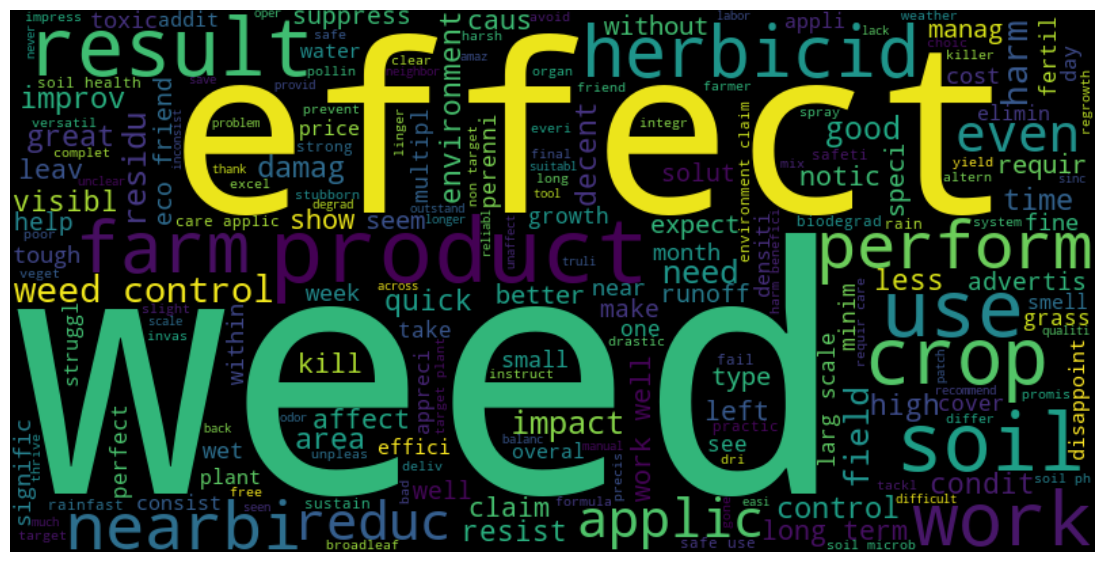

In [22]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text) # Generate the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

WordCloud( ) contains parameters including the following:

- background_color: Color of background
- max_words: The maximum number of unique words used
- stopwords: A stopword list to exclude the words you don’t wish to display
- colormap: The color theme
- width: The width of the WordCloud image
- height: The height of the WordCloud image

<h1 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'> Customize Color</h1>

*One of the features I like the most is the “colormap” argument which allow us to customize the color palette to we wanted. Let’s try using these
parameters with the Meta text corpus.*

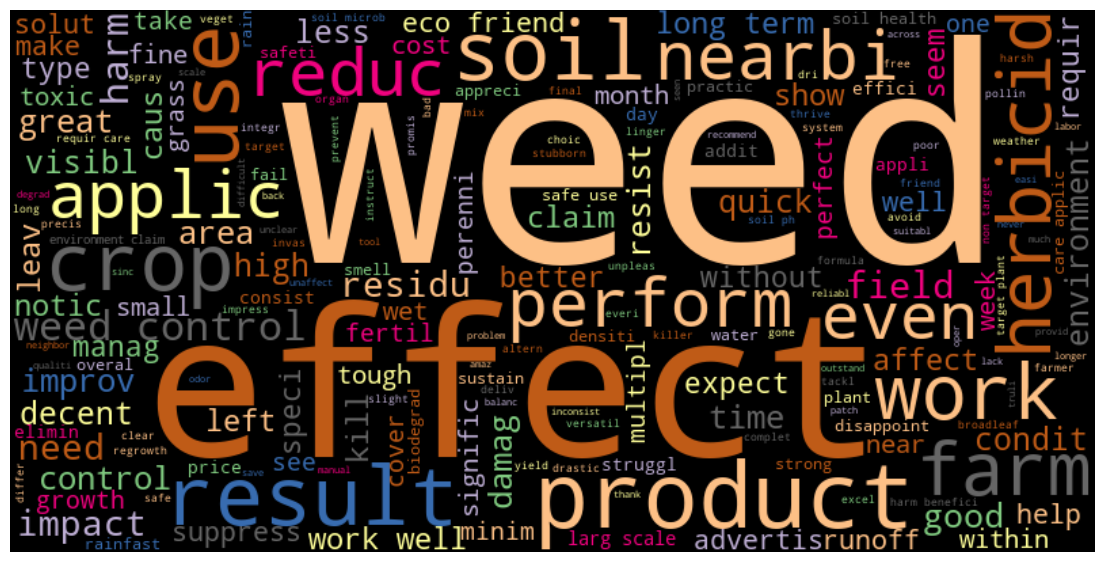

In [36]:
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap = 'Accent').generate(text) # Generate the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove the axes
plt.show()

<h1 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Color Values</h1>

*complete list of Color values you can choose from*

In [24]:
color =  ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn','BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r',
    'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd','OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired',
    'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r',
    'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn',
    'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r','YlGn', 
    'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r','YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r',
    'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr','bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm',
    'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
    'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar','gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
    'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv',
    'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r','nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink',
    'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer',
    'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b','tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo',
    'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

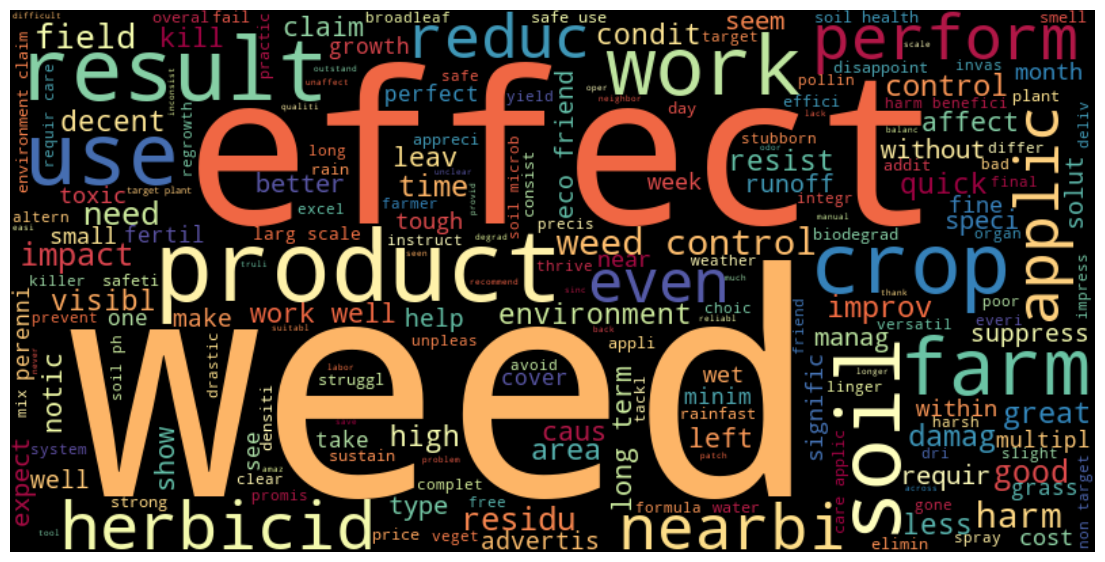

In [34]:
colormap = np.random.choice(color)
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap = colormap).generate(text) # Generate the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove the axes
plt.savefig('../Resources/Wordclaud.png')
plt.show()

<h1 style='font-size: 25px; color: crimson; font-family: Neuterous; font-weight: 600'>Customize Shape</h1>


*Here I’m importing the shape I want to use for the “mask”, which is the logo for Jabulente*

In [27]:
Weedkiller = np.array(Image.open('Feeling overwhelmed.png'))

*With the ‘Weedkiller’ variable, we have opened the image ‘Jabulente.png’. As you see from the output, NumPy convert the PIL images into array, indicating the value of each pixel of the image*

In [28]:
from PIL import Image, ImageOps

# Load and preprocess the mask image (handling transparency and colors)
mask_image = Image.open("Feeling overwhelmed.png").convert("RGBA")
background = Image.new("RGBA", mask_image.size, "WHITE")
background.paste(mask_image, (0, 0), mask_image)
mask_image = ImageOps.grayscale(background)
#mask_image = ImageOps.invert(mask_image)  # Invert to get black shape, white background
mask_image = mask_image.point(lambda p: p > 128 and 255)  # Binarize the image (strict black/white)
mask_array = np.array(mask_image)

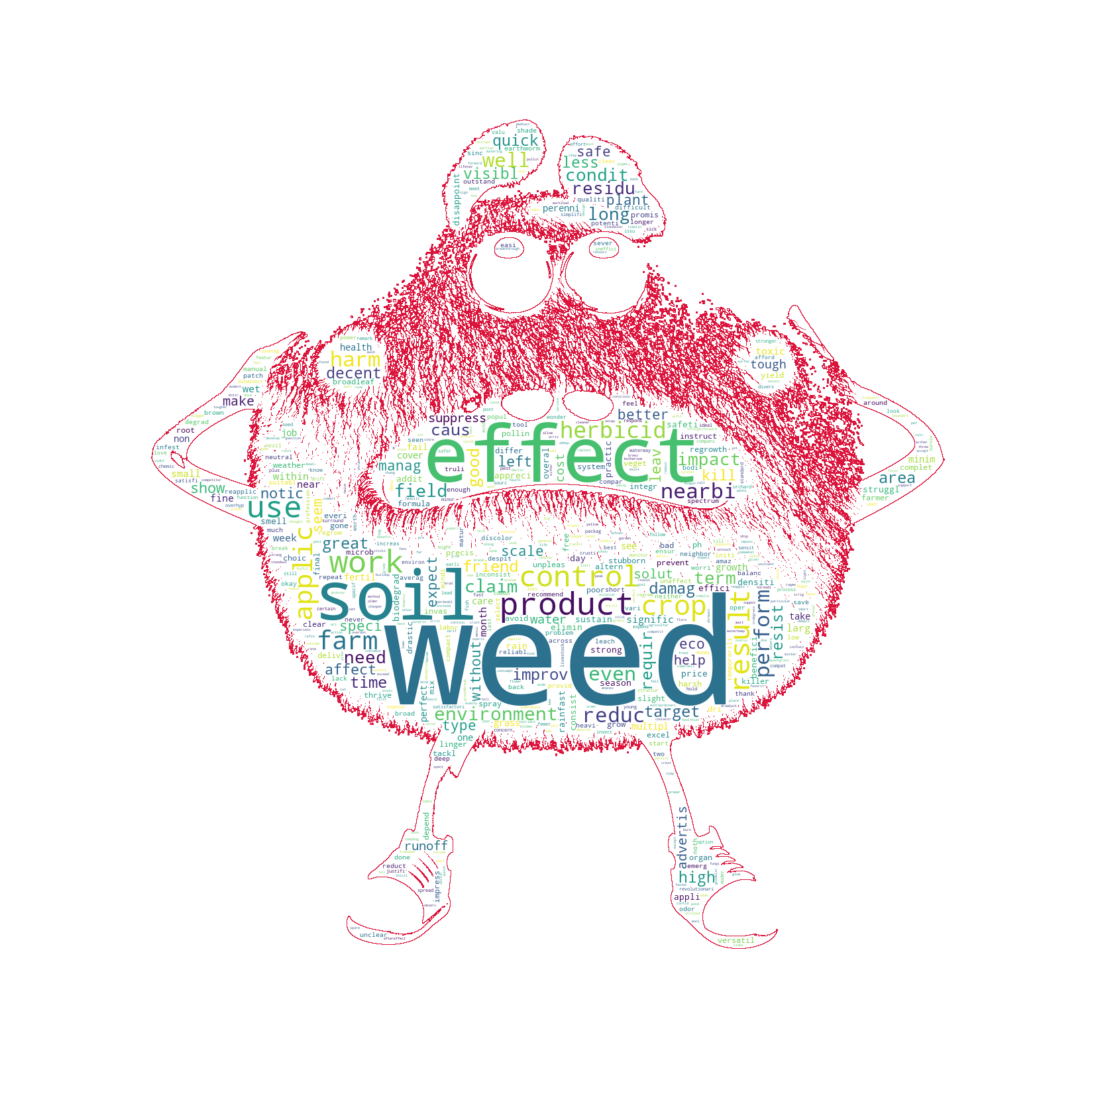

In [30]:
# Generate the word cloud with optimized mask
wordcloud = WordCloud(mask=mask_array, background_color='white',  max_words=1000,  contour_color='crimson',  
                      contour_width=1,  relative_scaling=0.5,  collocations=False,  max_font_size=1000).generate(text)

# Display the word cloud
plt.figure(figsize=(14, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h1 style='font-size: 65px; color: crimson; font-family: Neuterous; font-weight: 600; text-align: center;'> THE END</h1>